<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## The Central Limit Theorem

Week 3 | 1.1

---


Below is a definition of [the CLT](https://en.wikipedia.org/wiki/Central_limit_theorem):

> In probability theory, the central limit theorem (CLT) states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve) even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined (finite) expected value and finite variance, will be approximately normally distributed, regardless of the underlying distribution.

**What does this mean?**

Say you took many samples from a population distribution, for example 100 people at a time, and took a measurement like their mean weight. The distribution of means measured from the 100-person samples (drawn independently and at random) will be normally distributed.

**mean = mean of true population mean** and 

**standard deviation = standard error of the population mean**

where a **standard error = (standard deviation) / sqrt(N)**

check out:

http://blog.vctr.me/posts/central-limit-theorem.html

and http://www.usablestats.com/lessons/central_limit

for a couple of additional explanations.

---

## Exploring the CLT in code with athletes data

The interactive visualization below plots the distribution of a selected variable from the athletes data and the means of samples up to a specified iteration.

This demonstrates the CLT: the distribution of the means is normal, despite non-normal distributions of the variables!

Play around with the interactive visualization to get a feel for the CLT.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

from ipywidgets import *
from IPython.display import display

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [2]:
path_to_athletes_csv = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/highest_paid_athletes/Athletes.csv'
athletes = pd.read_csv(path_to_athletes_csv)

In [3]:
keep_cols = ['Rank','Name','Sport','Total Pay','Salary/Winnings','Endorsements',
             'Nation','Gender','Year of birth','Height (cm)']

for col in ['Total Pay','Salary/Winnings','Endorsements']:
    athletes[col] = [float(x.replace(',','').replace('$','')) for x in athletes[col]]

athletes = athletes[keep_cols]

In [4]:
def central_limit_visualization(data, title, means_array, 
                                current_samples_means, iteration):
        
    fig, axarr = plt.subplots(1, 2, figsize=(17, 7), sharex=False,
                              sharey=False)
    
    axarr[0] = sns.distplot(data, kde=False, bins=20, ax=axarr[0])
    
    axarr[0].axvline(np.mean(data), lw=5, c='black', ls='solid')
    
    true_average = '{0:.2f}'.format(np.mean(data))
    
    title0 = 'Distribution of ' + title + '; average = '  + true_average + '\n'
    axarr[0].set_title(title0, fontsize=16)
    
    bins = np.minimum(40, len(np.unique(means_array)))
    axarr[1] = sns.distplot(means_array, kde=False, ax=axarr[1], bins=bins,
                            color='grey', label='Sample '+str(iteration))
    
    current_samples_mean = current_samples_means[iteration-1]
    
    ax1_ymax, ax1_ymin = axarr[1].get_ylim()
    
    axarr[1].axvline(current_samples_mean, lw=5, c='gold', ls='solid', 
                     label='Average of means')
    
    
    samples_average_str = '{0:.2f}'.format(current_samples_mean)
    title1 = 'Distribution of sample iter: ' + str(iteration) +'; sample averages = ' + samples_average_str
    axarr[1].set_title(title1, fontsize=16)
    
    axarr[1].legend(loc='upper right')
    
    fig.subplots_adjust(left=0, right=1)
    plt.show()
    


In [5]:
total_pay = athletes['Total Pay'].values
salary = athletes['Salary/Winnings'].values
endorsements = athletes['Endorsements'].values
height = athletes['Height (cm)'].values

In [6]:
num_samples = 20

total_pay_samples = [np.random.choice(total_pay, size=num_samples, replace=False) for i in range(1000)]
salary_samples = [np.random.choice(salary, size=num_samples, replace=False) for i in range(1000)]
endorsement_samples = [np.random.choice(endorsements, size=num_samples, replace=False) for i in range(1000)]
height_samples = [np.random.choice(height, size=num_samples, replace=False) for i in range(1000)]

In [7]:

def plot_delegator(num_samples=5, dataset_choice='Total Pay'):
    
    if dataset_choice == 'Total Pay':
        data = total_pay
        samples = total_pay_samples[0:num_samples]
    elif dataset_choice == 'Salary/Winnings':
        data = salary
        samples = salary_samples[0:num_samples]
    elif dataset_choice == 'Endorsements':
        data = endorsements
        samples = endorsement_samples[0:num_samples]
    elif dataset_choice == 'Height (cm)':
        data = height
        samples = height_samples[0:num_samples]
        
    samples_means = [np.mean(x) for x in samples]
    current_samples_means = [np.mean(samples_means[0:i]) for i in range(1, len(samples_means)+1)]
    
    central_limit_visualization(data, dataset_choice, samples_means,
                                current_samples_means, 
                                num_samples)
    

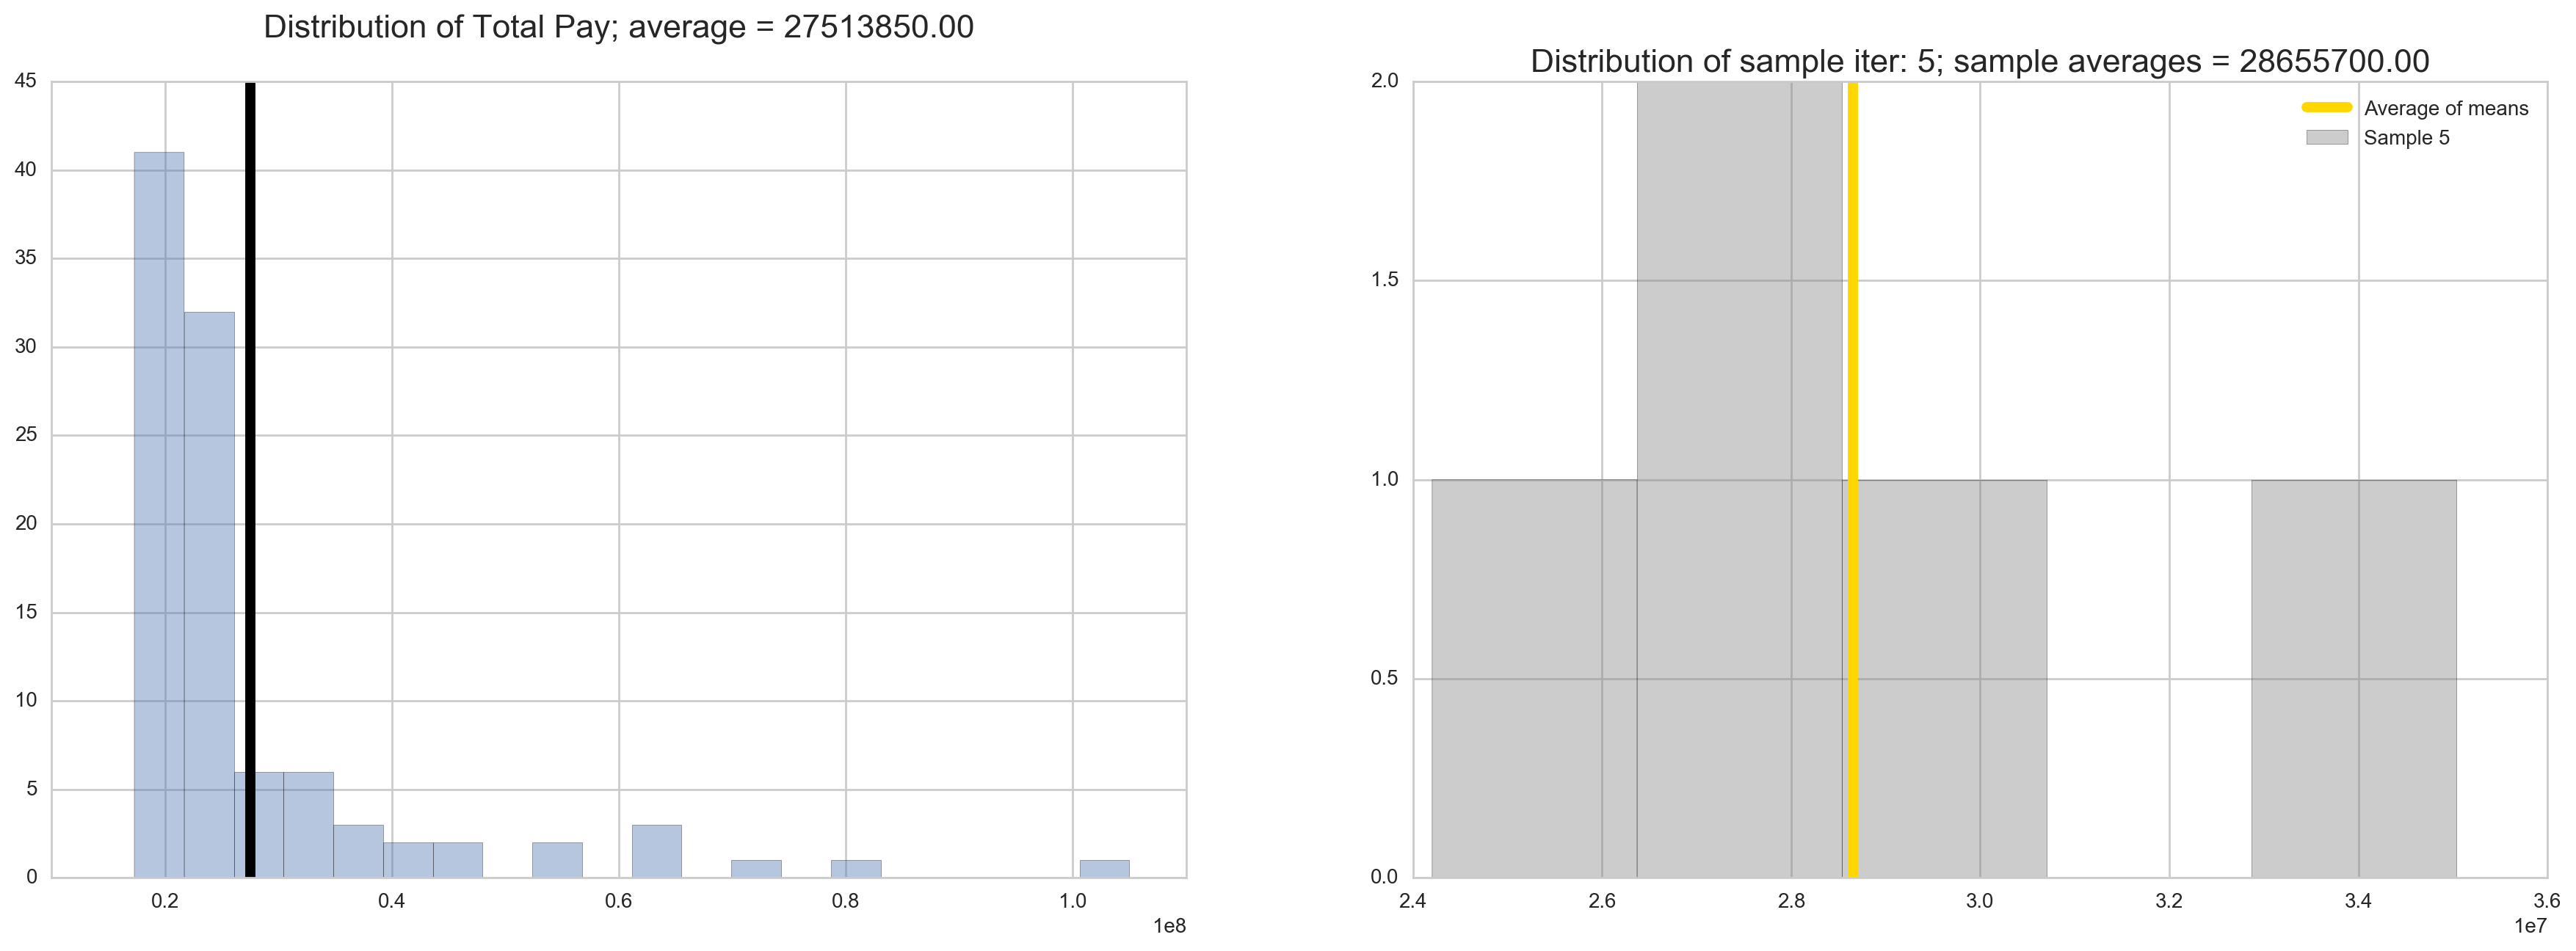

<function __main__.plot_delegator>

In [8]:
interact(plot_delegator, 
         num_samples=widgets.IntSlider(min=5, 
                                     max=500,
                                     step=1, 
                                     value=5,
                                     continuous_update=False),
         dataset_choice=('Total Pay','Salary/Winnings','Endorsements','Height (cm)'))
         